In [1]:
import numpy as np
import pandas as pd
import PIL.Image as Image
import os
import matplotlib.pyplot as plt

import tensorflow as tf

import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


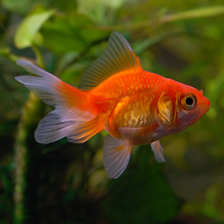

In [18]:
gold_fish =Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish
# gold_fish.shape

In [20]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [16]:
df = pd.read_fwf('ImageNetLabels.txt')
df.head()
df.background

0                  tench
1               goldfish
2      great white shark
3            tiger shark
4             hammerhead
             ...        
995            earthstar
996     hen-of-the-woods
997               bolete
998                  ear
999        toilet tissue
Name: background, Length: 1000, dtype: object

In [21]:
gold_fish[np.newaxis , ...]
# gold_fish.shape

array([[[[1.10726644e-03, 1.30718954e-03, 2.76816609e-04],
         [1.23029604e-03, 1.46097655e-03, 3.53710111e-04],
         [1.36870434e-03, 1.64552095e-03, 4.61361015e-04],
         ...,
         [1.29181084e-03, 1.53787005e-03, 1.53787005e-05],
         [1.26105344e-03, 1.50711265e-03, 1.53787005e-05],
         [1.21491734e-03, 1.44559785e-03, 0.00000000e+00]],

        [[1.12264514e-03, 1.30718954e-03, 3.22952710e-04],
         [1.27643214e-03, 1.49173395e-03, 4.30603614e-04],
         [1.38408304e-03, 1.66089965e-03, 5.07497116e-04],
         ...,
         [1.26105344e-03, 1.49173395e-03, 1.53787005e-05],
         [1.23029604e-03, 1.46097655e-03, 1.53787005e-05],
         [1.18415994e-03, 1.41484045e-03, 0.00000000e+00]],

        [[1.12264514e-03, 1.30718954e-03, 3.38331411e-04],
         [1.23029604e-03, 1.44559785e-03, 3.99846213e-04],
         [1.35332564e-03, 1.63014225e-03, 5.07497116e-04],
         ...,
         [1.24567474e-03, 1.47635525e-03, 1.53787005e-05],
         [

In [22]:
result = classifier.predict(gold_fish[np.newaxis , ...])
result.shape

1/1 [==============================] - 1s 778ms/step


(1, 1001)

In [23]:
predicted_label_index = np.argmax(result)
predicted_label_index

819

In [29]:
image_labels = []

with open('ImageNetLabels.txt' , 'r') as f:
    image_labels =f.read().splitlines()

image_labels[:7]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray']

In [30]:
image_labels[predicted_label_index]

'spotlight'

In [31]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [32]:
data_dir


'.\\datasets\\flower_photos'

In [33]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [34]:
list(data_dir.glob('*/*.jpg'))[:5]


[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [35]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [37]:
roses = list(data_dir.glob('roses/*'))
roses[:8]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg')]

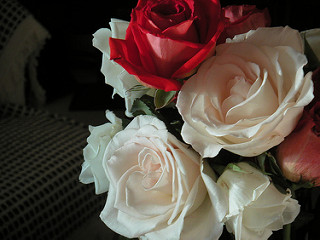

In [38]:
Image.open(str(roses[1]))

In [42]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:3]


[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg')]

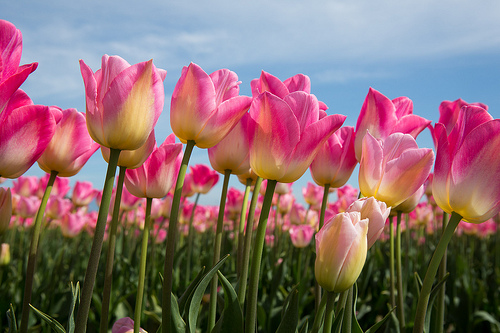

In [44]:
Image.open(str(tulips[3]))

In [45]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [46]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [47]:
flowers_images_dict['roses'][:5]


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [80]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape


(240, 179, 3)

In [81]:
cv2.resize(img , (224 , 224)).shape

(224, 224, 3)

In [48]:
str(flowers_images_dict['roses'][0])


'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [60]:
import cv2
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img
# img3 = plt.imshow(img)

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

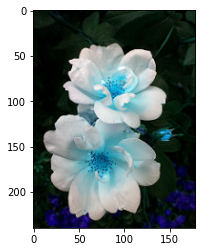

In [61]:
img3 = plt.imshow(img)

In [64]:
img.shape

(240, 179, 3)

In [66]:
img[0][0][0]

0

In [52]:
img.shape

(240, 179, 3)

In [53]:
cv2.resize(img , (224 ,224)).shape

(224, 224, 3)

In [85]:
X , y = [] , []

for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img , IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        

In [86]:
X[1].shape

(224, 224, 3)

In [87]:
X = np.array(X)
y = np.array(y)

In [88]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X , y , random_state = 0)

In [89]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [90]:
X[0].shape

(224, 224, 3)

In [76]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [107]:
x0_resized = cv2.resize(X[0] , IMAGE_SHAPE)
x1_resized = cv2.resize(X[1] , IMAGE_SHAPE)
x2_resized = cv2.resize(X[2] , IMAGE_SHAPE)

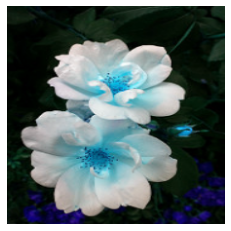

In [78]:
plt.axis('off')
plt.imshow(X[0])

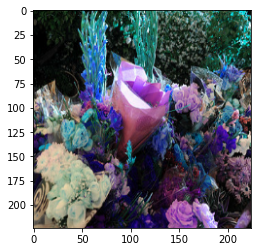

In [91]:
plt.imshow(X[3])

In [109]:
predicted = classifier.predict(np.array([x0_resized , x1_resized , x2_resized]))
predicted = np.argmax(predicted , axis = 1)
predicted

1/1 [==============================] - 0s 185ms/step


array([795, 880, 795], dtype=int64)

In [96]:
image_labels[795] , image_labels[880] , image_labels[795]

('shower curtain', 'umbrella', 'shower curtain')

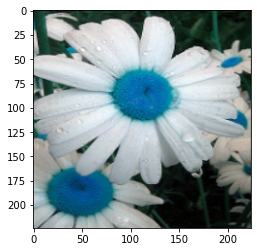

In [102]:
plt.imshow(X[795])

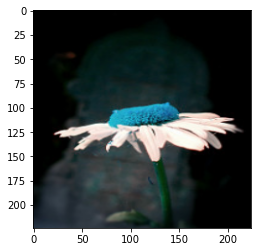

In [103]:
 plt.imshow(X[880])

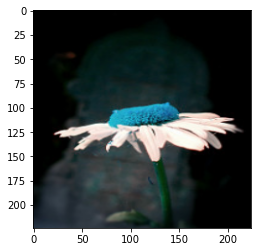

In [105]:
plt.imshow(X[880])

In [110]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
   feature_extractor_model , input_shape= (224,224,3) ,trainable =False         )

In [112]:
num_of_flowers =5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

In [113]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [117]:
model.compile(
    optimizer = 'adam' ,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True) ,
    metrics = ['accuracy'])

model.fit(X_train_scaled , y_train , epochs = 5)

Epoch 1/5
86/86 [==============================] - 91s 929ms/step - loss: 0.8121 - accuracy: 0.6988
Epoch 2/5
86/86 [==============================] - 77s 899ms/step - loss: 0.4088 - accuracy: 0.8619
Epoch 3/5
86/86 [==============================] - 77s 899ms/step - loss: 0.3158 - accuracy: 0.8975
Epoch 4/5
86/86 [==============================] - 76s 885ms/step - loss: 0.2659 - accuracy: 0.9204
Epoch 5/5
86/86 [==============================] - 76s 888ms/step - loss: 0.2281 - accuracy: 0.9364


In [118]:

model.evaluate(X_test_scaled  , y_test)


29/29 [==============================] - 31s 911ms/step - loss: 0.3792 - accuracy: 0.8595


[0.3791607916355133, 0.8594771027565002]